In [346]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from imblearn.over_sampling import SMOTE, ADASYN
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

import itertools
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

import itertools
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# set up the figure size
# plt.rcParams['figure.figsize'] = (20*.75, 10*.75)
# plt.rcParams['font.size'] = 20*.75
# plt.rcParams['axes.titlesize'] = 30*.75
# plt.rcParams['axes.labelsize'] = 20*.75
# plt.rcParams['xtick.labelsize'] = 20*.75
# plt.rcParams['ytick.labelsize'] = 20*.75


#axes.titlesize : 24
#axes.labelsize : 20
#lines.linewidth : 3
#lines.markersize : 10
#xtick.labelsize : 16
#ytick.labelsize : 16

class_names = ["FLOATING", "PADDLING", "SURFING"]

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Multinomial LR normalized confusion matrix")
    else:
        print('Multinomial LR confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [347]:
simple_multi_data = pd.read_csv('simple_multi_dataset.csv')

In [348]:
simple_multi_data = simple_multi_data.drop('ride_id',axis=1)
times = simple_multi_data['UTC']
simple_multi_data = simple_multi_data.drop('UTC',axis=1)
simple_multi_data.head(10)

,IMU A1,IMU A2,IMU A3,IMU G1,IMU G2,IMU G3,IMU M1,IMU M2,IMU M3,simple_label
0,0.344538,11.637728,2.775445,-2.195122,-5.000000,8.414634,-37.0,-165.0,197.0,PADDLING
1,-1.894959,10.087307,0.861345,16.585366,-4.146341,7.560976,-45.0,-163.0,201.0,PADDLING
2,-1.435575,10.699819,1.607844,1.829268,-6.219512,-4.390244,-42.0,-158.0,216.0,PADDLING
3,4.402430,8.288053,1.952382,-7.317073,-6.097561,3.292683,-41.0,-165.0,195.0,PADDLING
4,-1.856677,11.465459,2.392625,3.902439,-8.170732,20.121951,-46.0,-166.0,186.0,PADDLING
5,14.987403,21.839881,10.259576,-32.439024,0.121951,2.195122,-47.0,-165.0,175.0,PADDLING
6,-0.229692,8.307194,0.363679,57.073171,22.682927,-15.487805,-48.0,-180.0,150.0,PADDLING
7,-2.450048,12.652201,-1.186742,28.414634,-17.317073,5.853659,-50.0,-160.0,210.0,PADDLING
8,-2.048087,8.364617,3.273111,-0.365854,5.975610,10.853659,-50.0,-166.0,206.0,PADDLING
9,0.478525,10.604114,0.727358,-12.804878,-0.365854,4.756098,-56.0,-174.0,194.0,PADDLING


/Users/seankamano/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


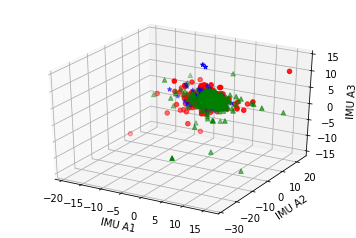

In [349]:
a1,a2,a3 = np.array(simple_multi_data['IMU A1']),np.array(simple_multi_data['IMU A2']),np.array(simple_multi_data['IMU A3']),

df = simple_multi_data.loc[(simple_multi_data['simple_label']=='PADDLING')]
a1_paddling = np.array(df['IMU A1'])
df = simple_multi_data.loc[(simple_multi_data['simple_label']=='SURFING')]
a1_surfing = np.array(df['IMU A1'])
df = simple_multi_data.loc[(simple_multi_data['simple_label']=='FLOATING')]
a1_floating = np.array(df['IMU A1'])

df = simple_multi_data.loc[(simple_multi_data['simple_label']=='PADDLING')]
a2_paddling = np.array(df['IMU A2'])
df = simple_multi_data.loc[(simple_multi_data['simple_label']=='SURFING')]
a2_surfing = np.array(df['IMU A2'])
df = simple_multi_data.loc[(simple_multi_data['simple_label']=='FLOATING')]
a2_floating = np.array(df['IMU A2'])

df = simple_multi_data.loc[(simple_multi_data['simple_label']=='PADDLING')]
a3_paddling = np.array(df['IMU A3'])
df = simple_multi_data.loc[(simple_multi_data['simple_label']=='SURFING')]
a3_surfing = np.array(df['IMU A3'])
df = simple_multi_data.loc[(simple_multi_data['simple_label']=='FLOATING')]
a3_floating = np.array(df['IMU A3'])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(a1_paddling,a2_paddling,a3_paddling,c='r',marker='o')
ax.scatter(a1_surfing,a2_surfing,a3_surfing,c='b',marker='*')
ax.scatter(a1_floating,a2_floating,a3_floating,c='g',marker='^')
ax.set_xlabel('IMU A1')
ax.set_ylabel('IMU A2')
ax.set_zlabel('IMU A3')
fig.show()

In [350]:
import datetime
i = 0
for t in times:
    tmp = t.split()
    year,month,day = tmp[0].split('-')
    year,month,day = int(year),int(month),int(day)
    h,mn,sec = tmp[1].split(':')
    calc_micro = lambda x: 1e6*(float(x) - np.floor(float(x)))
    h,mn,micro = int(h),int(mn),calc_micro(sec)
    times[i] = datetime.datetime(year,month,day,hour=h,minute=mn,second=int(np.floor(float(sec))),microsecond=int(round(micro)))
    i += 1

In [351]:
times[0],times[1]
(times[1] - times[0]).total_seconds()

0.264

# Implement Kalman Filter
Code from here: https://arxiv.org/pdf/1204.0375.pdf

In [385]:
from numpy import dot, sum, tile, linalg
def kf_predict(X, P, A, Q, B, U):
    X = np.dot(A, X) + np.dot(B, U)
    P = np.dot(A, np.dot(P, A.T)) + Q
    return(X,P) 

from numpy.linalg import inv,det
    
def kf_update(X, P, Y, H, R):
    IM = dot(H, X)
    IS = R + dot(H, dot(P, H.T))
    K = dot(P, dot(H.T, inv(IS)))
    X = X + dot(K, (Y-IM))
    P = P - dot(K, dot(IS, K.T))
    LH = gauss_pdf(Y, IM, IS)
    return (X,P,K,IM,IS,LH)

def gauss_pdf(X, M, S):
    if M.shape[1] == 1:
        DX = X - tile(M, X.shape[1])
        E = 0.5 * sum(DX * (dot(inv(S), DX)), axis=0)
        E = E + 0.5 * M.shape[0] * log(2 * pi) + 0.5 * log(det(S))
        P = exp(-E)
    elif X.shape[1] == 1:
        DX = tile(X, M.shape[1])- M
        E = 0.5 * sum(DX * (dot(inv(S), DX)), axis=0)
        E = E + 0.5 * M.shape[0] * log(2 * pi) + 0.5 * log(det(S))
        P = exp(-E)
    else:
        DX = X-M
        E = 0.5 * dot(DX.T, dot(inv(S), DX))
        E = E + 0.5 * M.shape[0] * log(2 * pi) + 0.5 * log(det(S))
        P = exp(-E)
    return (P[0],E[0]) 

# Initialize State Matrices

In [394]:
from numpy import *
from numpy.linalg import inv,pinv

dt = 0.25
X = array([[0.0],
           [0.0],
           [0.0],
           [0.0],
           [0.0],
           [0.0],
           [0.0],
           [0.0],
           [0.0]
          ])

P = diag((0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01))

A = array([[1, 0, 0, dt,  0, 0, 0, 0, 0 ], 
           [0, 1, 0, 0 , dt, 0, 0, 0, 0 ], 
           [0, 0, 1, 0 ,  0, dt, 0, 0, 0 ], 
           [0, 0, 0, 1 ,  0, 0, 0, 0, 0 ], 
           [0, 0, 0, 0 ,  1, 0, 0, 0, 0 ], 
           [0, 0, 0, 0 ,  0, 1, 0, 0, 0 ],
           [0, 0, 0, 0 ,  0, 0, 1, 0, 0 ],
           [0, 0, 0, 0 ,  0, 0, 0, 1, 0 ],
           [0, 0, 0, 0 ,  0, 0, 0, 0, 1 ]
          ])

Q = 0.05*eye(X.shape[0])
B = eye(X.shape[0])
U = zeros((X.shape[0],1)) 

# Measurement matrices
a1,a2,a3 = simple_multi_data['IMU A1'], simple_multi_data['IMU A2'], simple_multi_data['IMU A3']
g1,g2,g3 = simple_multi_data['IMU G1'], simple_multi_data['IMU G2'], simple_multi_data['IMU G3']

Y = array([[a1[0]],
           [a2[0]],
           [a3[0]],
           [g1[0]],
           [g2[0]],
           [g3[0]]
          ])

H = array([[0, 0, 0, 1 ,  0, 0, 0, 0, 0 ], 
           [0, 0, 0, 0 ,  1, 0, 0, 0, 0 ], 
           [0, 0, 0, 0 ,  0, 1, 0, 0, 0 ],
           [0, 0, 0, 0 ,  0, 0, 1, 0, 0 ],
           [0, 0, 0, 0 ,  0, 0, 0, 1, 0 ],
           [0, 0, 0, 0 ,  0, 0, 0, 0, 1 ]
          ])

R = 0.3*eye(Y.shape[0]) 

# Applying the Kalman Filter
v1 = np.zeros((len(simple_multi_data),1))
v2 = np.zeros((len(simple_multi_data),1))
v3 = np.zeros((len(simple_multi_data),1))

ka1 = np.zeros((len(simple_multi_data),1))
ka2 = np.zeros((len(simple_multi_data),1))
ka3 = np.zeros((len(simple_multi_data),1))

kg1 = np.zeros((len(simple_multi_data),1))
kg2 = np.zeros((len(simple_multi_data),1))
kg3 = np.zeros((len(simple_multi_data),1))

for i in range(len(simple_multi_data)-1):
    (X, P) = kf_predict(X, P, A, Q, B, U)
    (X, P, K, IM, IS, LH) = kf_update(X, P, Y, H, R) 
    
    v1[i],v2[i],v3[i]    = X[0],X[1],X[2]
    ka1[i],ka2[i],ka3[i] = X[3],X[4],X[5]
    kg1[i],kg2[i],kg3[i] = X[6],X[7],X[8]
    
    Y = array([[a1[i+1]],
               [a2[i+1]],
               [a3[i+1]],
               [g1[i+1]],
               [g2[i+1]],
               [g3[i+1]]               
              ])
    dt = (times[i+1] - times[i]).total_seconds()
    
    A = array([[1, 0, 0, dt,  0, 0, 0, 0, 0 ], 
               [0, 1, 0, 0 , dt, 0, 0, 0, 0 ], 
               [0, 0, 1, 0 ,  0, dt, 0, 0, 0 ], 
               [0, 0, 0, 1 ,  0, 0, 0, 0, 0 ], 
               [0, 0, 0, 0 ,  1, 0, 0, 0, 0 ], 
               [0, 0, 0, 0 ,  0, 1, 0, 0, 0 ],
               [0, 0, 0, 0 ,  0, 0, 1, 0, 0 ],
               [0, 0, 0, 0 ,  0, 0, 0, 1, 0 ],
               [0, 0, 0, 0 ,  0, 0, 0, 0, 1 ]
              ])



/Users/seankamano/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


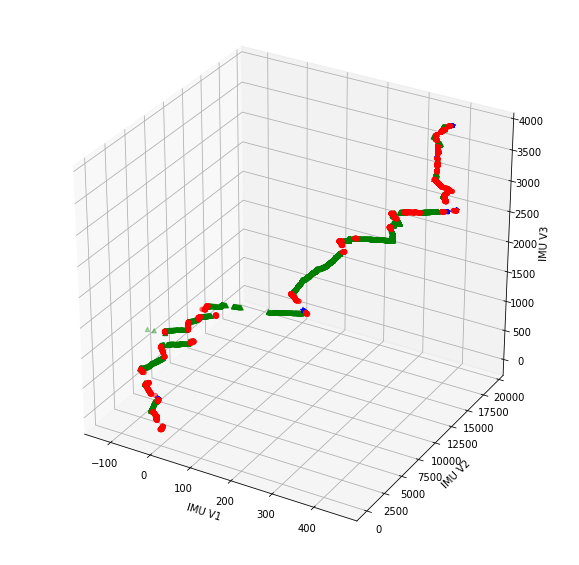

In [354]:
v1_paddling = np.zeros((len(a1_paddling),1))
v2_paddling = np.zeros((len(a2_paddling),1))
v3_paddling = np.zeros((len(a3_paddling),1))

v1_floating = np.zeros((len(a1_floating),1))
v2_floating = np.zeros((len(a2_floating),1))
v3_floating = np.zeros((len(a3_floating),1))

v1_surfing = np.zeros((len(a1_surfing),1))
v2_surfing = np.zeros((len(a2_surfing),1))
v3_surfing = np.zeros((len(a3_surfing),1))

paddle_idx,float_idx,surf_idx,idx = 0,0,0,0
for label in simple_multi_data['simple_label']:
    if label == 'PADDLING':        
        v1_paddling[paddle_idx] = v1[idx]
        v2_paddling[paddle_idx] = v2[idx]
        v3_paddling[paddle_idx] = v3[idx]        
        paddle_idx += 1
    elif label == 'FLOATING':
        v1_floating[float_idx] = v1[idx]
        v2_floating[float_idx] = v2[idx]
        v3_floating[float_idx] = v3[idx]
        float_idx += 1
    elif label == 'SURFING':
        v1_surfing[surf_idx] = v1[idx]
        v2_surfing[surf_idx] = v2[idx]
        v3_surfing[surf_idx] = v3[idx]
        surf_idx += 1
    idx += 1

fig2 = plt.figure(1,figsize=(10,10))
ax2 = fig2.add_subplot(111, projection='3d')
ax2.scatter(v1_floating,v2_floating,v3_floating,c='g',marker='^')
ax2.scatter(v1_paddling,v2_paddling,v3_paddling,c='r',marker='o')
ax2.scatter(v1_surfing,v2_surfing,v3_surfing,c='b',marker='*')
ax2.set_xlabel('IMU V1')
ax2.set_ylabel('IMU V2')
ax2.set_zlabel('IMU V3')
fig2.show()

There is significant drift in the data above. We seek to mitigate this by using the trapezoidal approximation on filtered accelerometer data.

/Users/seankamano/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


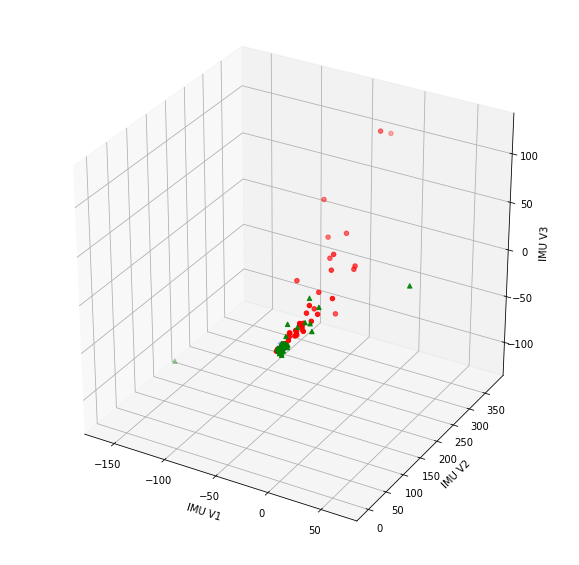

In [399]:
v1 = np.zeros((len(simple_multi_data),1))
v2 = np.zeros((len(simple_multi_data),1))
v3 = np.zeros((len(simple_multi_data),1))

tmp = simple_multi_data['simple_label']
for i in range(len(simple_multi_data)):
    if i > 0:
        delta_t = (times[i] - times[i-1]).total_seconds()
    else: 
        delta_t = 0.25
        
    if i < 1:
        v1[i] = a1[i]*delta_t/2
        v2[i] = a2[i]*delta_t/2
        v3[i] = a3[i]*delta_t/2
    else:
        v1[i] = v1[i] + (a1[i-1] + a1[i])*delta_t/2
        v2[i] = v2[i] + (a2[i-1] + a2[i])*delta_t/2  
        v3[i] = v3[i] + (a3[i-1] + a3[i])*delta_t/2

# Assign labels to velocity measurements
v1_paddling = np.zeros((len(a1_paddling),1))
v2_paddling = np.zeros((len(a2_paddling),1))
v3_paddling = np.zeros((len(a3_paddling),1))

v1_floating = np.zeros((len(a1_floating),1))
v2_floating = np.zeros((len(a2_floating),1))
v3_floating = np.zeros((len(a3_floating),1))

v1_surfing = np.zeros((len(a1_surfing),1))
v2_surfing = np.zeros((len(a2_surfing),1))
v3_surfing = np.zeros((len(a3_surfing),1))


paddle_idx,float_idx,surf_idx,idx = 0,0,0,0
for label in simple_multi_data['simple_label']:
    # Create 'windows': 3s, 5s, 10s, ...
    if label == 'PADDLING':        
        v1_paddling[paddle_idx] = v1[idx]
        v2_paddling[paddle_idx] = v2[idx]
        v3_paddling[paddle_idx] = v3[idx]        
        paddle_idx += 1
    elif label == 'FLOATING':
        v1_floating[float_idx] = v1[idx]
        v2_floating[float_idx] = v2[idx]
        v3_floating[float_idx] = v3[idx]
        float_idx += 1
    elif label == 'SURFING':
        v1_surfing[surf_idx] = v1[idx]
        v2_surfing[surf_idx] = v2[idx]
        v3_surfing[surf_idx] = v3[idx]
        surf_idx += 1
    idx += 1
    
fig3 = plt.figure(1,figsize=(10,10))
ax3 = fig3.add_subplot(111, projection='3d')
ax3.scatter(v1_floating,v2_floating,v3_floating,c='g',marker='^')
ax3.scatter(v1_paddling,v2_paddling,v3_paddling,c='r',marker='o')
ax3.scatter(v1_surfing,v2_surfing,v3_surfing,c='b',marker='*')
ax3.set_xlabel('IMU V1')
ax3.set_ylabel('IMU V2')
ax3.set_zlabel('IMU V3')
fig3.show()

The drift is better, but not exactly ideal.

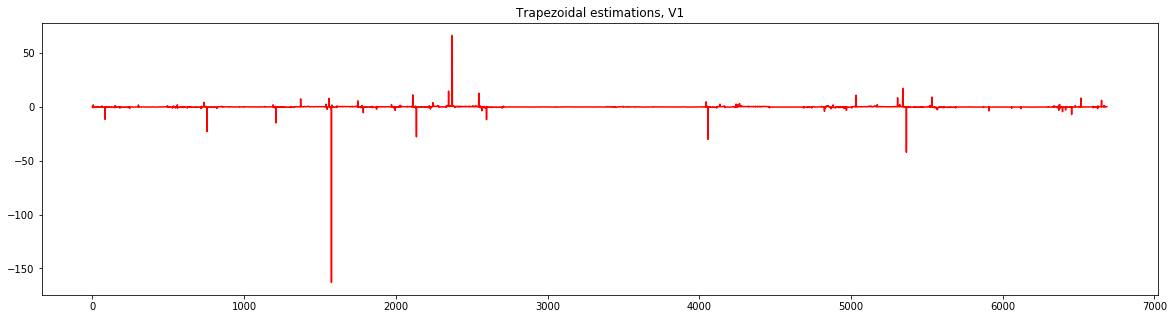

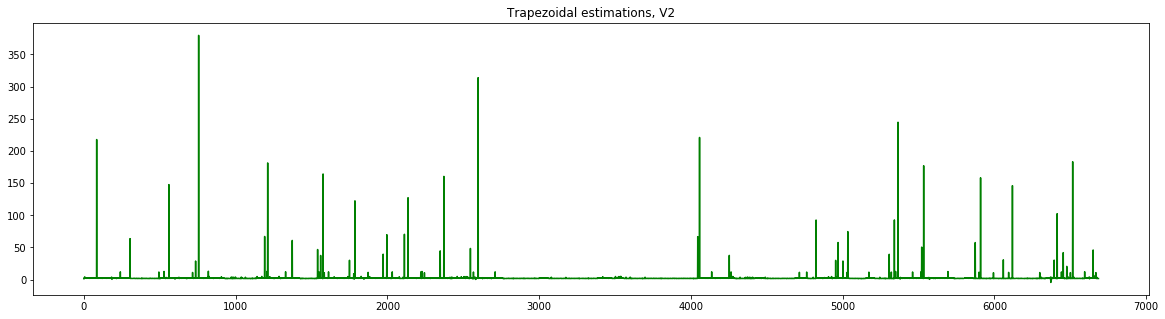

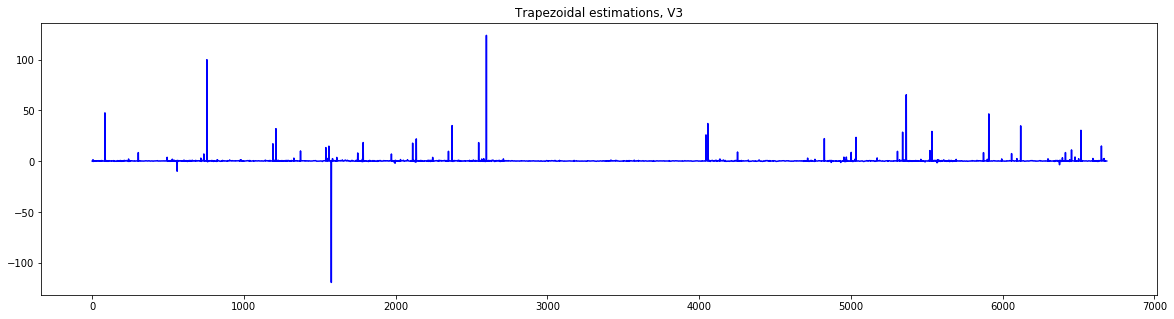

In [400]:
plt.figure(1,figsize=(20,5))
plt.title('Trapezoidal estimations, V1')
plt.plot(v1[:-1],'r')
plt.figure(2,figsize=(20,5))
plt.title('Trapezoidal estimations, V2')
plt.plot(v2[:-1],'g')
plt.figure(3,figsize=(20,5))
plt.title('Trapezoidal estimations, V3')
plt.plot(v3[:-1],'b')
plt.show()

Use a mean and median filter to deal with the noise spikes. 

In [401]:
def mean_and_median_filter(v1,v2,v3,bin_size=40):
    offset = 0
    avgs_v,meds_v,avgs_g,meds_g = [],[],[],[]
    v1_tmp,v2_tmp,v3_tmp = v1,v2,v3

    for idx in range(0,len(v1_tmp)+1):

        if idx >= bin_size-1:       
            # velocity
            tmp1,tmp2,tmp3 = v1_tmp[offset:idx+1],v2_tmp[offset:idx+1],v3_tmp[offset:idx+1]
            offset += 1
        else:
            tmp1,tmp2,tmp3 = v1_tmp[0:idx+1],v2_tmp[0:idx+1],v3_tmp[0:idx+1]

        avg1,avg2,avg3 = np.mean(tmp1),np.mean(tmp2),np.mean(tmp3)
        med1,med2,med3 = np.median(tmp1),np.median(tmp2),np.median(tmp3)

        avgs_v.append([avg1,avg2,avg3])
        meds_v.append([med1,med2,med3])

    df1 = pd.DataFrame(avgs_v, columns=['AVG 1','AVG 2','AVG 3'])
    df2 = pd.DataFrame(meds_v, columns=['MED 1','MED 2','MED 3'])
    df_stats = pd.concat([df1,df2],axis=1)
    
    return df_stats

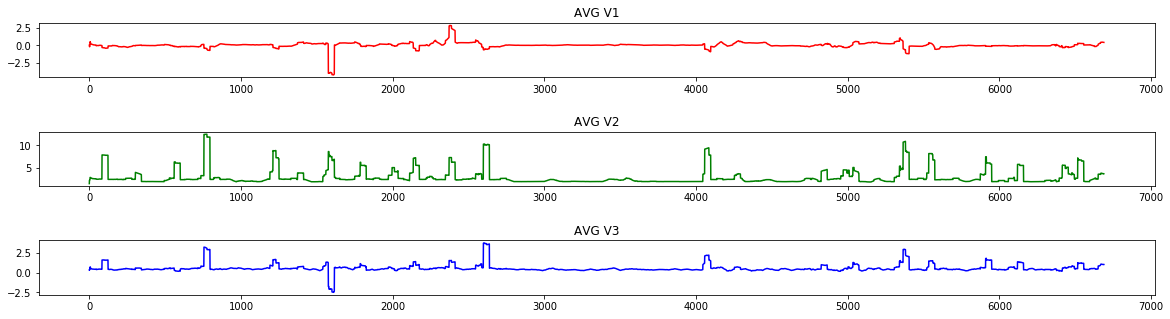

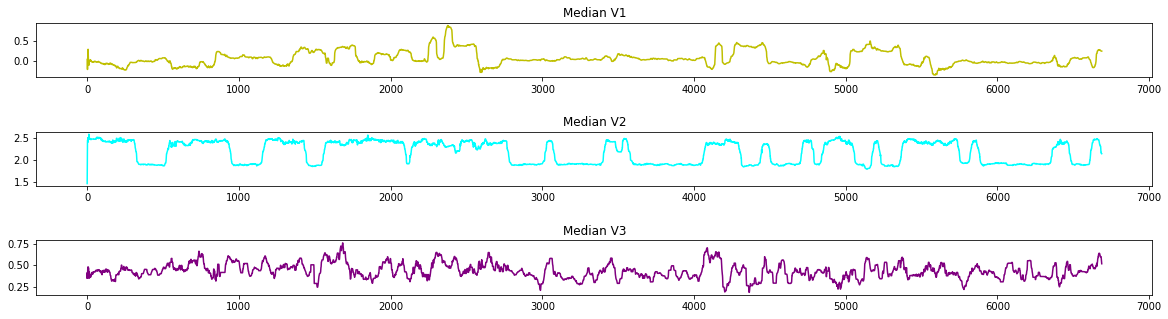

In [404]:
d = mean_and_median_filter(v1,v2,v3)
avg_v1 = d['AVG 1'].values
avg_v2 = d['AVG 2'].values
avg_v3 = d['AVG 3'].values
med_v1 = d['MED 1'].values
med_v2 = d['MED 2'].values
med_v3 = d['MED 3'].values

dg = mean_and_median_filter(kg1,kg2,kg3)
avg_g1 = dg['AVG 1'].values
avg_g2 = dg['AVG 2'].values
avg_g3 = dg['AVG 3'].values
med_g1 = dg['MED 1'].values
med_g2 = dg['MED 2'].values
med_g3 = dg['MED 3'].values

da = mean_and_median_filter(ka1,ka2,ka3)
avg_a1 = dg['AVG 1'].values
avg_a2 = dg['AVG 2'].values
avg_a3 = dg['AVG 3'].values
med_a1 = dg['MED 1'].values
med_a2 = dg['MED 2'].values
med_a3 = dg['MED 3'].values

plt.figure(1,figsize=(20,5))
plt.subplot(311)
plt.plot(avg_v1,'r')
plt.title('AVG V1')
plt.subplot(312)
plt.plot(avg_v2,'g')
plt.title('AVG V2')
plt.subplot(313)
plt.plot(avg_v3,'b')
plt.title('AVG V3')
plt.subplots_adjust(hspace=1)

plt.figure(2,figsize=(20,5))
plt.subplot(311)
plt.plot(med_v1,'y')
plt.title('Median V1')
plt.subplot(312)
plt.plot(med_v2,'cyan')
plt.title('Median V2')
plt.subplot(313)
plt.plot(med_v3,'purple')
plt.title('Median V3')
plt.subplots_adjust(hspace=1)
plt.show()

/Users/seankamano/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


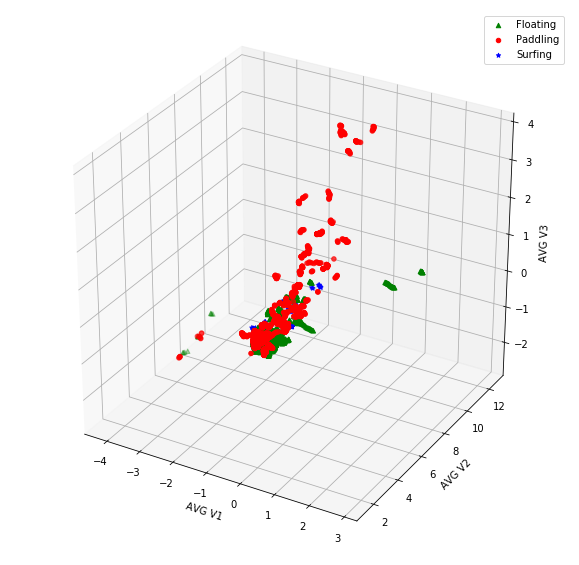

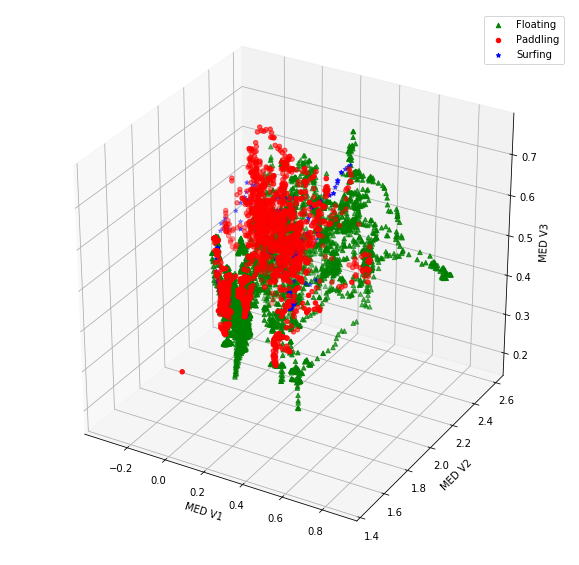

In [359]:
avg_v1_paddling = np.zeros((len(a1_paddling),1))
avg_v2_paddling = np.zeros((len(a2_paddling),1))
avg_v3_paddling = np.zeros((len(a3_paddling),1))

avg_v1_floating = np.zeros((len(a1_floating),1))
avg_v2_floating = np.zeros((len(a2_floating),1))
avg_v3_floating = np.zeros((len(a3_floating),1))

avg_v1_surfing = np.zeros((len(a1_surfing),1))
avg_v2_surfing = np.zeros((len(a2_surfing),1))
avg_v3_surfing = np.zeros((len(a3_surfing),1))

med_v1_paddling = np.zeros((len(a1_paddling),1))
med_v2_paddling = np.zeros((len(a2_paddling),1))
med_v3_paddling = np.zeros((len(a3_paddling),1))

med_v1_floating = np.zeros((len(a1_floating),1))
med_v2_floating = np.zeros((len(a2_floating),1))
med_v3_floating = np.zeros((len(a3_floating),1))

med_v1_surfing = np.zeros((len(a1_surfing),1))
med_v2_surfing = np.zeros((len(a2_surfing),1))
med_v3_surfing = np.zeros((len(a3_surfing),1))

paddle_idx,float_idx,surf_idx,idx = 0,0,0,0
for label in simple_multi_data['simple_label']:
    if label == 'PADDLING':        
        avg_v1_paddling[paddle_idx] = avg_v1[idx]
        avg_v2_paddling[paddle_idx] = avg_v2[idx]
        avg_v3_paddling[paddle_idx] = avg_v3[idx] 
        
        med_v1_paddling[paddle_idx] = med_v1[idx]
        med_v2_paddling[paddle_idx] = med_v2[idx]
        med_v3_paddling[paddle_idx] = med_v3[idx] 
        
        paddle_idx += 1
    elif label == 'FLOATING':
        avg_v1_floating[float_idx] = avg_v1[idx]
        avg_v2_floating[float_idx] = avg_v2[idx]
        avg_v3_floating[float_idx] = avg_v3[idx]
        
        med_v1_floating[float_idx] = med_v1[idx]
        med_v2_floating[float_idx] = med_v2[idx]
        med_v3_floating[float_idx] = med_v3[idx] 
        
        float_idx += 1
    elif label == 'SURFING':
        avg_v1_surfing[surf_idx] = avg_v1[idx]
        avg_v2_surfing[surf_idx] = avg_v2[idx]
        avg_v3_surfing[surf_idx] = avg_v3[idx]
        
        med_v1_surfing[surf_idx] = med_v1[idx]
        med_v2_surfing[surf_idx] = med_v2[idx]
        med_v3_surfing[surf_idx] = med_v3[idx] 
        
        surf_idx += 1
    idx += 1

fig_avg_v = plt.figure(1,figsize=(10,10))
ax_avg_v = fig_avg_v.add_subplot(111, projection='3d')
ax_avg_v.scatter(avg_v1_floating,avg_v2_floating,avg_v3_floating,c='g',marker='^')
ax_avg_v.scatter(avg_v1_paddling,avg_v2_paddling,avg_v3_paddling,c='r',marker='o')
ax_avg_v.scatter(avg_v1_surfing,avg_v2_surfing,avg_v3_surfing,c='b',marker='*')
plt.legend(('Floating', 'Paddling','Surfing'), loc='upper right');
ax_avg_v.set_xlabel('AVG V1')
ax_avg_v.set_ylabel('AVG V2')
ax_avg_v.set_zlabel('AVG V3')
fig_avg_v.show()

fig_med_v = plt.figure(2,figsize=(10,10))
ax_med_v = fig_med_v.add_subplot(111, projection='3d')
ax_med_v.scatter(med_v1_floating,med_v2_floating,med_v3_floating,c='g',marker='^')
ax_med_v.scatter(med_v1_paddling,med_v2_paddling,med_v3_paddling,c='r',marker='o')
ax_med_v.scatter(med_v1_surfing,med_v2_surfing,med_v3_surfing,c='b',marker='*')
plt.legend(('Floating', 'Paddling','Surfing'), loc='upper right');
ax_med_v.set_xlabel('MED V1')
ax_med_v.set_ylabel('MED V2')
ax_med_v.set_zlabel('MED V3')
fig_med_v.show()

This data is clearly more separable than the raw and even filtered accelerometer data.

In [360]:
kalman_v = {'Kalman V1':[float(v) for v in v1],'Kalman V2':[float(v) for v in v2],'Kalman V3':[float(v) for v in v3]}
kalman_a = {'KA1':[float(a) for a in ka1],'KA2':[float(a) for a in ka2],'KA3':[float(a) for a in ka3]}
kalman_g = {'KG1':[float(g) for g in kg1],'KG2':[float(g) for g in kg2],'KA3':[float(g) for g in kg3]}
med_v = {'MED V1':[float(v) for v in med_v1],'MED V2':[float(v) for v in med_v2],'MED V3':[float(v) for v in med_v3]}
avg_v = {'AVG V1':[float(v) for v in avg_v1],'AVG V2':[float(v) for v in avg_v2],'AVG V3':[float(v) for v in avg_v3]}

In [361]:
kalman_v_df = pd.DataFrame(data=kalman_v)
kalman_a_df = pd.DataFrame(data=kalman_a)
avg_v_df = pd.DataFrame(data=avg_v)
med_v_df = pd.DataFrame(data=med_v)
d = pd.concat([kalman_v_df, kalman_a_df,avg_v_df,med_v_df], axis=1)
simple_multi_data = pd.concat([simple_multi_data.drop('simple_label',axis=1),d,simple_multi_data['simple_label']],axis=1)

In [363]:
# Use below to drop the last row, which contains NaNs. The output should be (6688,22)
# simple_multi_data.drop(simple_multi_data.tail(1).index,inplace=True)
simple_multi_data.shape

(6688, 22)

/Users/seankamano/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


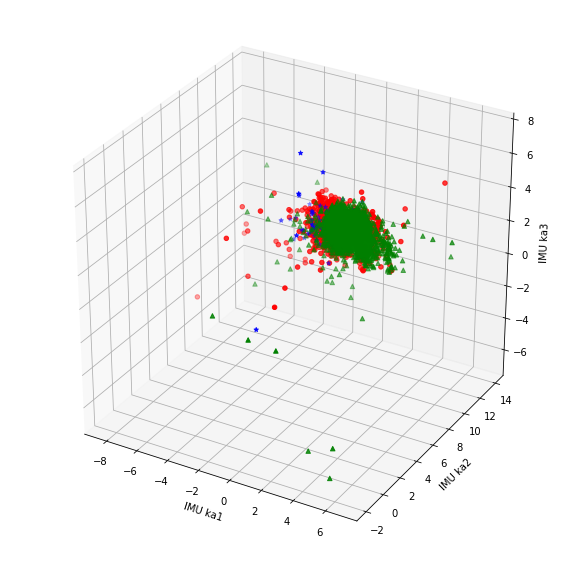

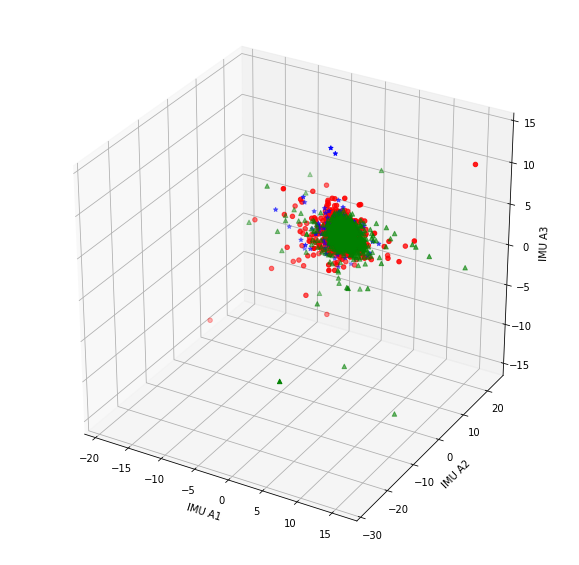

In [364]:
ka1 = simple_multi_data['KA1'].values
ka2 = simple_multi_data['KA2'].values
ka3 = simple_multi_data['KA3'].values

ka1_paddling = np.zeros((len(a1_paddling),1))
ka2_paddling = np.zeros((len(a2_paddling),1))
ka3_paddling = np.zeros((len(a3_paddling),1))

ka1_floating = np.zeros((len(a1_floating),1))
ka2_floating = np.zeros((len(a2_floating),1))
ka3_floating = np.zeros((len(a3_floating),1))

ka1_surfing = np.zeros((len(a1_surfing),1))
ka2_surfing = np.zeros((len(a2_surfing),1))
ka3_surfing = np.zeros((len(a3_surfing),1))

paddle_idx,float_idx,surf_idx,idx = 0,0,0,0
for label in simple_multi_data['simple_label']:
    if label == 'PADDLING':        
        ka1_paddling[paddle_idx] = ka1[idx]
        ka2_paddling[paddle_idx] = ka2[idx]
        ka3_paddling[paddle_idx] = ka3[idx]        
        paddle_idx += 1
    elif label == 'FLOATING':
        ka1_floating[float_idx] = ka1[idx]
        ka2_floating[float_idx] = ka2[idx]
        ka3_floating[float_idx] = ka3[idx]
        float_idx += 1
    elif label == 'SURFING':
        ka1_surfing[surf_idx] = ka1[idx]
        ka2_surfing[surf_idx] = ka2[idx]
        ka3_surfing[surf_idx] = ka3[idx]
        surf_idx += 1
    idx += 1

fig_ka = plt.figure(1,figsize=(10,10))
ax_ka = fig_ka.add_subplot(111, projection='3d')
ax_ka.scatter(ka1_floating,ka2_floating,ka3_floating,c='g',marker='^')
ax_ka.scatter(ka1_paddling,ka2_paddling,ka3_paddling,c='r',marker='o')
ax_ka.scatter(ka1_surfing,ka2_surfing,ka3_surfing,c='b',marker='*')
ax_ka.set_xlabel('IMU ka1')
ax_ka.set_ylabel('IMU ka2')
ax_ka.set_zlabel('IMU ka3')
fig_ka.show()

fig_a = plt.figure(2,figsize=(10,10))
ax_a = fig_a.add_subplot(111, projection='3d')
ax_a.scatter(a1_paddling,a2_paddling,a3_paddling,c='r',marker='o')
ax_a.scatter(a1_surfing,a2_surfing,a3_surfing,c='b',marker='*')
ax_a.scatter(a1_floating,a2_floating,a3_floating,c='g',marker='^')
ax_a.set_xlabel('IMU A1')
ax_a.set_ylabel('IMU A2')
ax_a.set_zlabel('IMU A3')
fig_a.show()

Filtered (top) and raw (bottom) accelerometer data are shown above.

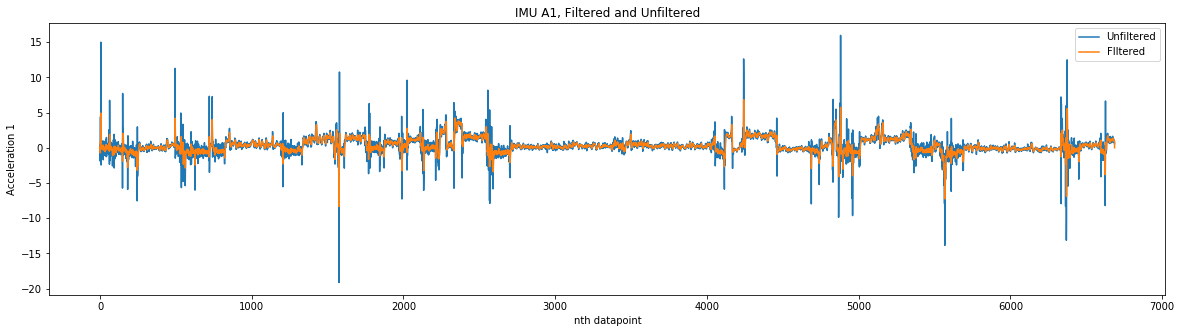

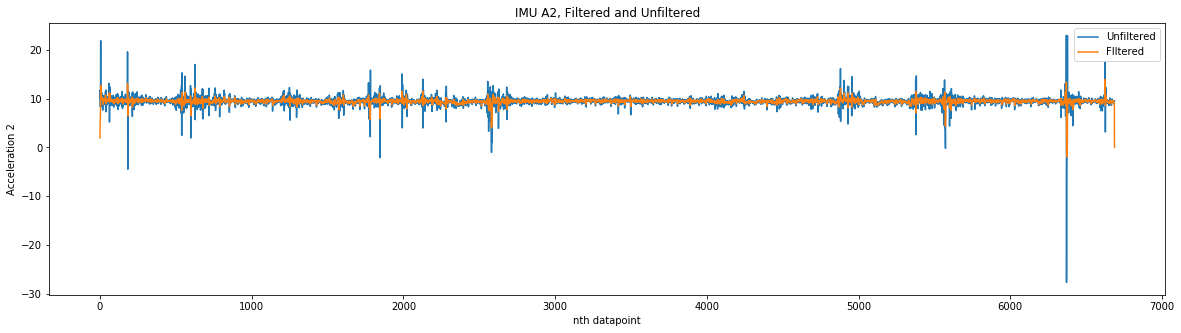

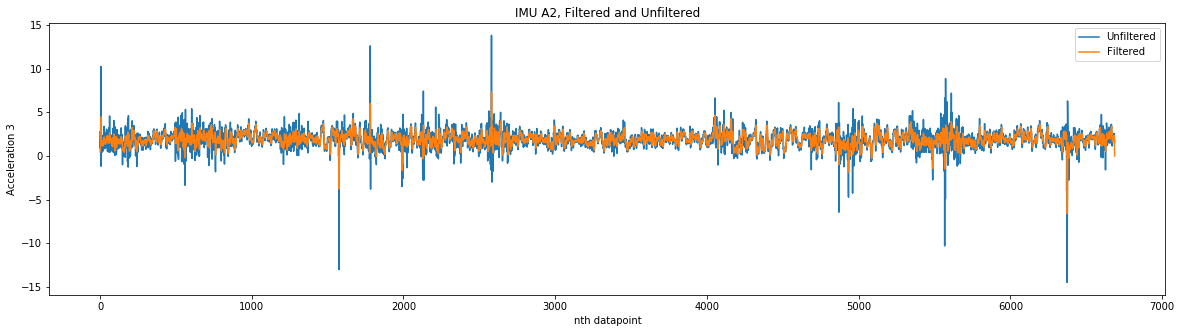

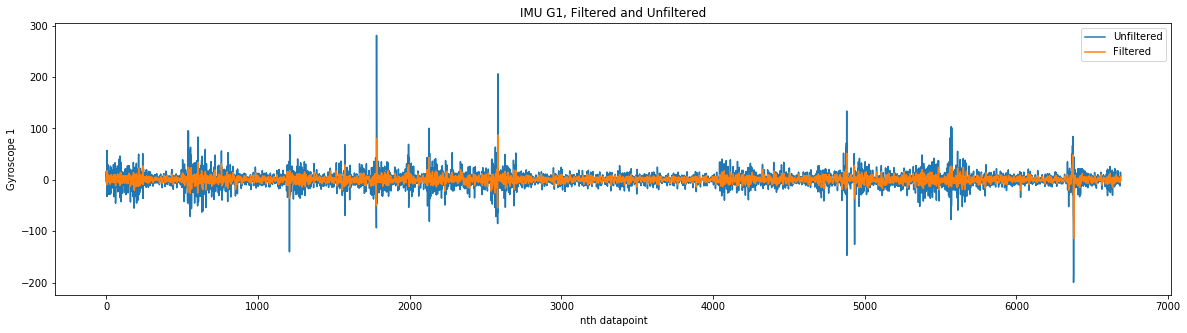

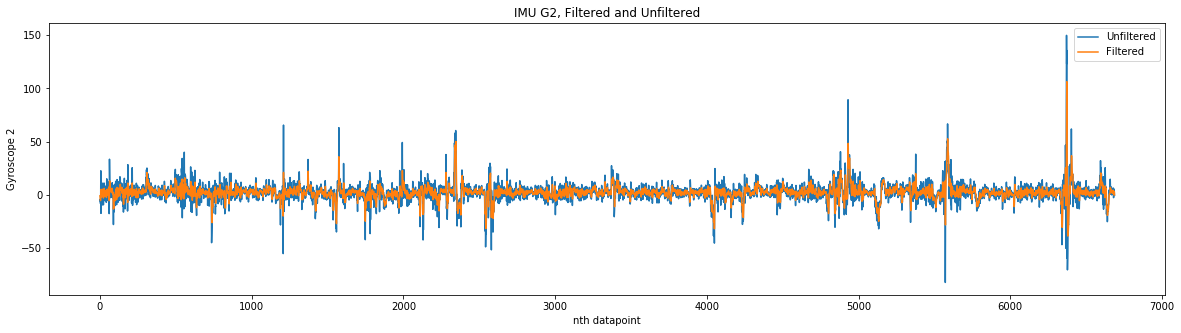

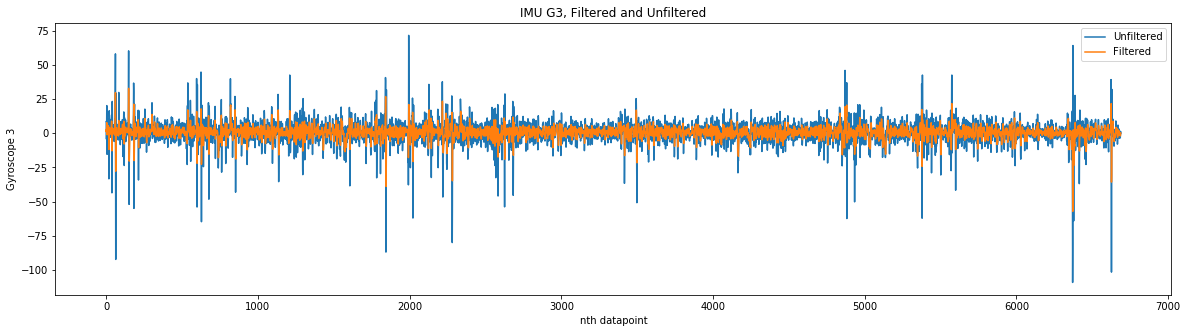

In [395]:
plt.figure(1,figsize=(20,5));
plt.title('IMU A1, Filtered and Unfiltered');
plt.plot(a1);
plt.plot(ka1);
plt.xlabel('nth datapoint')
plt.ylabel('Acceleration 1')
plt.legend(('Unfiltered', 'Kalman', 'Kalman + Savgol'), loc='upper right');

plt.figure(2,figsize=(20,5));
plt.title('IMU A2, Filtered and Unfiltered');
plt.title
plt.plot(a2);
plt.plot(ka2);
plt.xlabel('nth datapoint')
plt.ylabel('Acceleration 2')
plt.legend(('Unfiltered', 'Kalman', 'Kalman + Savgol'), loc='upper right');

plt.figure(3,figsize=(20,5));
plt.title('IMU A2, Filtered and Unfiltered');
plt.plot(a3);
plt.plot(ka3);
plt.xlabel('nth datapoint')
plt.ylabel('Acceleration 3')
plt.legend(('Unfiltered', 'Kalman', 'Kalman + Savgol'), loc='upper right');
plt.show();

plt.figure(4,figsize=(20,5));
plt.title('IMU G1, Filtered and Unfiltered');
plt.plot(g1);
plt.plot(kg1);
plt.xlabel('nth datapoint')
plt.ylabel('Gyroscope 1')
plt.legend(('Unfiltered', 'Kalman', 'Kalman + Savgol');
plt.show();

plt.figure(5,figsize=(20,5));
plt.title('IMU G2, Filtered and Unfiltered');
plt.plot(g2);
plt.plot(kg2);
plt.xlabel('nth datapoint')
plt.ylabel('Gyroscope 2')
plt.legend(('Unfiltered', 'Kalman', 'Kalman + Savgol'), loc='upper right');
plt.show();

plt.figure(6,figsize=(20,5));
plt.title('IMU G3, Filtered and Unfiltered');
plt.plot(g3);
plt.plot(kg3);
plt.xlabel('nth datapoint')
plt.ylabel('Gyroscope 3')
plt.legend(('Unfiltered', 'Kalman', 'Kalman + Savgol'), loc='upper right');
plt.show();

In [369]:
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

class ModelTest:
    """
    Creates an instance of a test using Smartfin IMU data. Things like the model, the data used,
    whether or not to balance/scale the data, and other parameters are included so as to streamline the testing
    process.
    """
    def __init__(self,model='MLP',data=simple_multi_data,use_balanced_data=False,scale_data=True,PCA=False,components=7):
        """
        model: String, should be either 'MLP' or 'SVM' for now
        
        data: a dataframe consisting only of IMU data, calculated metrics, and labels.
              
        use_balanced_data: Boolean, 'True' to balance the training set, 'False' to leave the data unbalanced
        
        scale_data: Boolean, 'True' to scale all features, 'False' to leave them unscaled
        
        ********************************************************************************************
        NOTE: ModelTest has been modified to support PCA, and simple_multi_data is supported now
        ********************************************************************************************
        """
        self.model = model
        self.data = data
        self.PCA = PCA
        self.use_balanced_data = use_balanced_data
        self.scale_data = scale_data
        self.components = components
        self.setUp()
        
    def set_data(d):
        self.data = d
        
    def set_model(m):
        self.model = m
        
    def set_use_balanced_data(b):
        self.use_balanced_data = b
    
    def set_scale_data(s):
        self.scale_data = s
        
    def setUp(self):

        print("Setting up test...")
        print("Separating features and labels within the dataset...")
        if not self.PCA:
            self.X = self.data.drop(columns='simple_label',axis=1).values
        else:
            pca = PCA(n_components=self.components,svd_solver='full')
            X = simple_multi_data.drop(columns='simple_label',axis=1).values
            self.X = pca.fit_transform(X)

        self.y = simple_multi_data['simple_label'].values   #selects the last column 
        print("X.shape:", self.X.shape)
        print("y.shape:", self.y.shape)
        print("y:", self.y)

        print("*"*50)
        
        print("Splitting data into training and test sets...")
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(self.X, self.y, test_size = 0.1, random_state = 0)
        
        print("X_train shape:", self.X_train.shape)
        print("y_train shape:", self.y_train.shape)
        print("X_test shape:", self.X_test.shape)
        print("y_test shape:", self.y_test.shape)
                       
        if self.use_balanced_data:
            print("Balancing training set...")
            self.X_train, self.y_train = SMOTE().fit_resample(self.X_train, self.y_train)
            print("X_train shape:", self.X_train.shape)
            print("y_train shape:", self.y_train.shape)
            
        if self.scale_data:
            print("Scaling data...")
            scaler = StandardScaler()
            scaler.fit(self.X_train)
            self.X_train = scaler.transform(self.X_train)
            self.X_test = scaler.transform(self.X_test)
                 
        print("Training model...")
        
        if self.model == 'MLP':
            self.clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(15,15), random_state=1, verbose=True)
            self.clf.fit(self.X_train, self.y_train)
        elif self.model == 'SVM':
            self.clf = SVC(kernel='linear')  
            self.clf.fit(self.X_train, self.y_train) 
            #Making predictions: use the predict method of the SVC class
            self.y_pred = self.clf.predict(self.X_test)
        else:
            print("Specified model is invalid: use 'set_model()' to specify a valid model.\nSupported models are 'SVM' and 'MLP'")
        
        self.y_pred = self.clf.predict(self.X_test)
        self.runTest()
        
    def runTest(self):
        print("Running test...")
        
        self.cm = confusion_matrix(y_true=self.y_test, y_pred=self.y_pred, labels=["FLOATING", "PADDLING", "SURFING"])
#         plt.figure()
#         plt.grid('off')

        #plot_confusion_matrix(self.cm, classes=class_names,
                              #title='Multinomial Confusion Matrix')

        # Plot normalized confusion matrix
        plt.figure()
        plot_confusion_matrix(self.cm, classes=class_names, normalize=True,
                              title='Normalized Multinomial Confusion Matrix')
        
        # cross validation score
        score = cross_val_score(estimator = self.clf, X = self.X, y = self.y, cv = 10)
        print(score)
        print('Average cross validation score: ', np.mean(score))
        print('Median cross validation score: ', np.median(score))
        print('Standard Deviation of cross validation scores: ', np.sqrt(np.var(score)))
        print('\n\n')

# Testing models with improved velocity calculations and Kalman filtered data

In [405]:
simple_multi_data.shape

(6688, 22)

Setting up test...
Separating features and labels within the dataset...
X.shape: (6688, 21)
y.shape: (6688,)
y: ['PADDLING' 'PADDLING' 'PADDLING' ... 'SURFING' 'SURFING' 'SURFING']
**************************************************
Splitting data into training and test sets...
X_train shape: (6019, 21)
y_train shape: (6019,)
X_test shape: (669, 21)
y_test shape: (669,)
Scaling data...
Balancing training set...
X_train shape: (11694, 21)
y_train shape: (11694,)
Training model...
Running test...
Multinomial LR normalized confusion matrix
[[0.93719807 0.06280193 0.        ]
 [0.06086957 0.93478261 0.00434783]
 [0.         0.12       0.88      ]]
[0.62089552 0.87462687 0.77279522 0.8206278  0.83707025 0.80717489
 0.75149701 0.80389222 0.49251497 0.5494012 ]
Average cross validation score:  0.7330495938716236
Median cross validation score:  0.7883437161551337
Standard Deviation of cross validation scores:  0.12455111263031983





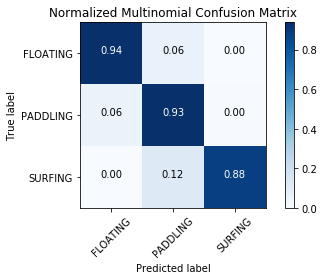

In [368]:
MLP_test_kalman=ModelTest(model='MLP',data=simple_multi_data,use_balanced_data=True,scale_data=True)

Setting up test...
Separating features and labels within the dataset...
X.shape: (6688, 21)
y.shape: (6688,)
y: ['PADDLING' 'PADDLING' 'PADDLING' ... 'SURFING' 'SURFING' 'SURFING']
**************************************************
Splitting data into training and test sets...
X_train shape: (6019, 21)
y_train shape: (6019,)
X_test shape: (669, 21)
y_test shape: (669,)
Balancing training set...
X_train shape: (11694, 21)
y_train shape: (11694,)
Scaling data...
Training model...
Running test...
Multinomial LR normalized confusion matrix
[[0.9178744  0.07971014 0.00241546]
 [0.0826087  0.90869565 0.00869565]
 [0.         0.08       0.92      ]]
[0.62089552 0.87462687 0.77279522 0.8206278  0.83707025 0.80717489
 0.75149701 0.80389222 0.49251497 0.5494012 ]
Average cross validation score:  0.7330495938716236
Median cross validation score:  0.7883437161551337
Standard Deviation of cross validation scores:  0.12455111263031983





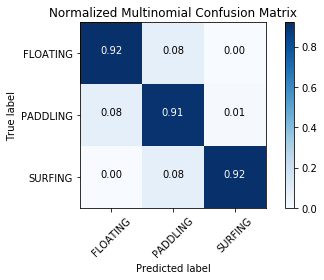

In [370]:
MLP_test_kalman=ModelTest(model='MLP',data=simple_multi_data,use_balanced_data=True,scale_data=True)

# PCA

In [252]:
pca = PCA(n_components='mle',svd_solver='full')
X = simple_multi_data.drop(columns='simple_label',axis=1).values
X_new = pca.fit_transform(X)
X_new.shape

(6688, 20)

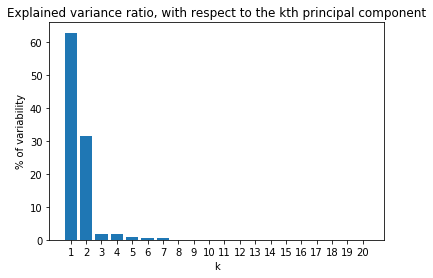

In [250]:
plt.bar(range(1,len(pca.explained_variance_ratio_)+1),pca.explained_variance_ratio_*100)
plt.title('Explained variance ratio, with respect to the kth principal component')
plt.xticks(range(1,21))
plt.ylabel('% of variability')
plt.xlabel('k')
plt.show()

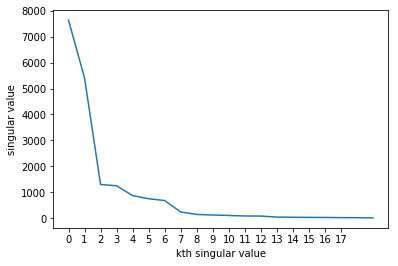

In [234]:
plt.plot(pca.singular_values_)
plt.xlabel('kth singular value')
plt.ylabel('singular value')
plt.xticks(range(18))
plt.show()

From the plots above, we'll want to keep the first seven principal components since they capture most of the variability within the data. We will use this to project our data onto the principal component subspace, which will hopefully improve our accuracy through getting good discriminants and reducing the dimensionality of our problem.

# PCA: Visualizations

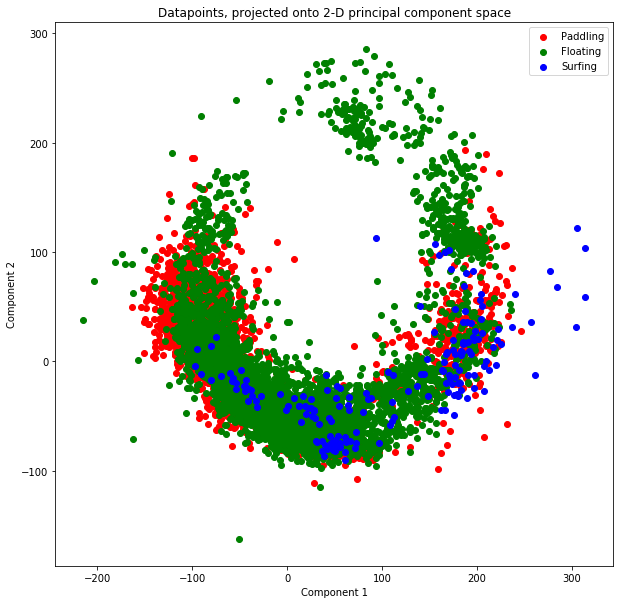

In [285]:
pca_2 = PCA(n_components=2,svd_solver='full')
X_2 = simple_multi_data.drop(columns='simple_label',axis=1).values
X_new_2 = pca_2.fit_transform(X_2)

T1_paddling = np.zeros((len(a1_paddling),1))
T2_paddling = np.zeros((len(a2_paddling),1))

T1_floating = np.zeros((len(a1_floating),1))
T2_floating = np.zeros((len(a2_floating),1))

T1_surfing = np.zeros((len(a1_surfing),1))
T2_surfing = np.zeros((len(a2_surfing),1))

T1,T2 = X_new_2[:,0],X_new_2[:,1]

paddle_idx,float_idx,surf_idx,idx = 0,0,0,0
for label in simple_multi_data['simple_label']:
    if label == 'PADDLING':        
        T1_paddling[paddle_idx] = T1[idx]
        T2_paddling[paddle_idx] = T2[idx]      
        paddle_idx += 1
    elif label == 'FLOATING':
        T1_floating[float_idx] = T1[idx]
        T2_floating[float_idx] = T2[idx]
        float_idx += 1
    elif label == 'SURFING':
        T1_surfing[surf_idx] = T1[idx]
        T2_surfing[surf_idx] = T2[idx]
        surf_idx += 1
    idx += 1
    
plt.figure(1,figsize=(10,10))
plt.title('Datapoints, projected onto 2-D principal component space')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.scatter(T1_paddling,T2_paddling,c='r')
plt.scatter(T1_floating,T2_floating,c='g')
plt.scatter(T1_surfing,T2_surfing,c='b')
plt.legend(('Paddling', 'Floating','Surfing'))
plt.show()

/Users/seankamano/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


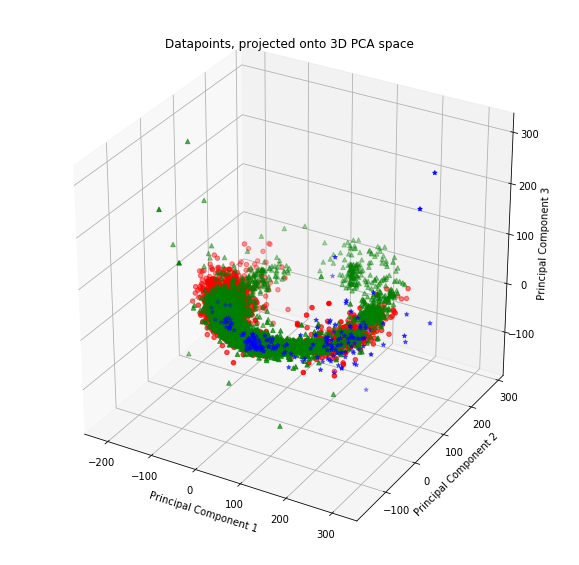

In [289]:
pca_3 = PCA(n_components=3,svd_solver='full')
X_3 = simple_multi_data.drop(columns='simple_label',axis=1).values
X_new_3 = pca_3.fit_transform(X_3)

print("Scaling data...")
scaler = StandardScaler()
scaler.fit(X_new_3)
X_new_3 = scaler.transform(X_new_3)

print("Balancing training set...")
self.X_train, self.y_train = SMOTE().fit_resample(self.X_train, self.y_train)
print("X_train shape:", self.X_train.shape)
print("y_train shape:", self.y_train.shape)

X_new_3 = SMOTE.fit_resample

T1_paddling = np.zeros((len(a1_paddling),1))
T2_paddling = np.zeros((len(a2_paddling),1))
T3_paddling = np.zeros((len(a3_paddling),1))

T1_floating = np.zeros((len(a1_floating),1))
T2_floating = np.zeros((len(a2_floating),1))
T3_floating = np.zeros((len(a3_floating),1))

T1_surfing = np.zeros((len(a1_surfing),1))
T2_surfing = np.zeros((len(a2_surfing),1))
T3_surfing = np.zeros((len(a3_surfing),1))

T1,T2,T3 = X_new_3[:,0],X_new_3[:,1],X_new_3[:,2]

paddle_idx,float_idx,surf_idx,idx = 0,0,0,0
for label in simple_multi_data['simple_label']:
    if label == 'PADDLING':        
        T1_paddling[paddle_idx] = T1[idx]
        T2_paddling[paddle_idx] = T2[idx]  
        T3_paddling[paddle_idx] = T3[idx]  
        paddle_idx += 1
    elif label == 'FLOATING':
        T1_floating[float_idx] = T1[idx]
        T2_floating[float_idx] = T2[idx]
        T3_floating[float_idx] = T3[idx]
        float_idx += 1
    elif label == 'SURFING':
        T1_surfing[surf_idx] = T1[idx]
        T2_surfing[surf_idx] = T2[idx]
        T3_surfing[surf_idx] = T3[idx]
        surf_idx += 1
    idx += 1

fig_pca = plt.figure(figsize=(10,10))
ax_pca = fig_pca.add_subplot(111, projection='3d')
ax_pca.scatter(T1_paddling,T2_paddling,T3_paddling,c='r',marker='o')
ax_pca.scatter(T1_surfing,T2_surfing,T3_surfing,c='b',marker='*')
ax_pca.scatter(T1_floating,T2_floating,T3_floating,c='g',marker='^')
ax_pca.set_xlabel('Principal Component 1')
ax_pca.set_ylabel('Principal Component 2')
ax_pca.set_zlabel('Principal Component 3')
ax_pca.set_title('Datapoints, projected onto 3D PCA space')
fig_pca.show()

# PCA Tests, MLP

Setting up test...
Separating features and labels within the dataset...
X.shape: (6688, 3)
y.shape: (6688,)
y: ['PADDLING' 'PADDLING' 'PADDLING' ... 'SURFING' 'SURFING' 'SURFING']
**************************************************
Splitting data into training and test sets...
X_train shape: (6019, 3)
y_train shape: (6019,)
X_test shape: (669, 3)
y_test shape: (669,)
Balancing training set...
X_train shape: (11694, 3)
y_train shape: (11694,)
Scaling data...
Training model...
Running test...
Multinomial LR normalized confusion matrix
[[0.54830918 0.20772947 0.24396135]
 [0.17826087 0.63913043 0.1826087 ]
 [0.16       0.2        0.64      ]]
[0.60746269 0.84776119 0.61434978 0.67862481 0.79073244 0.71001495
 0.77994012 0.80688623 0.41467066 0.40269461]
Average cross validation score:  0.6653137470457653
Median cross validation score:  0.6943198804185351
Standard Deviation of cross validation scores:  0.1490332556805549





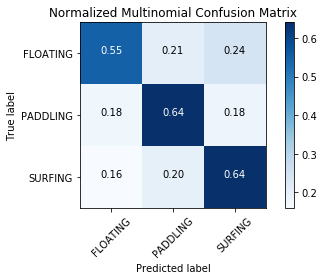

In [371]:
MLP_test_PCA=ModelTest(model='MLP',data=simple_multi_data,use_balanced_data=True,scale_data=True,PCA=True,components=3)

Setting up test...
Separating features and labels within the dataset...
X.shape: (6688, 10)
y.shape: (6688,)
y: ['PADDLING' 'PADDLING' 'PADDLING' ... 'SURFING' 'SURFING' 'SURFING']
**************************************************
Splitting data into training and test sets...
X_train shape: (6019, 10)
y_train shape: (6019,)
X_test shape: (669, 10)
y_test shape: (669,)
Balancing training set...
X_train shape: (11694, 10)
y_train shape: (11694,)
Scaling data...
Training model...
Running test...
Multinomial LR normalized confusion matrix
[[0.852657   0.12318841 0.02415459]
 [0.21304348 0.74347826 0.04347826]
 [0.2        0.16       0.64      ]]
[0.57910448 0.85820896 0.80119581 0.88490284 0.79671151 0.81016442
 0.7739521  0.76796407 0.46107784 0.50898204]
Average cross validation score:  0.7242264069678728
Median cross validation score:  0.7853318027621886
Standard Deviation of cross validation scores:  0.14260268904206067





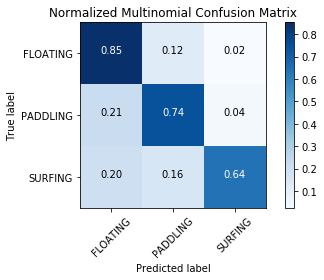

In [372]:
MLP_test_PCA=ModelTest(model='MLP',data=simple_multi_data,use_balanced_data=True,scale_data=True,PCA=True,components=10)

Setting up test...
Separating features and labels within the dataset...
X.shape: (6688, 15)
y.shape: (6688,)
y: ['PADDLING' 'PADDLING' 'PADDLING' ... 'SURFING' 'SURFING' 'SURFING']
**************************************************
Splitting data into training and test sets...
X_train shape: (6019, 15)
y_train shape: (6019,)
X_test shape: (669, 15)
y_test shape: (669,)
Scaling data...
Balancing training set...
X_train shape: (11694, 15)
y_train shape: (11694,)
Training model...
Running test...
Multinomial LR normalized confusion matrix
[[0.86714976 0.12318841 0.00966184]
 [0.17391304 0.8        0.02608696]
 [0.04       0.4        0.56      ]]
[0.54626866 0.9119403  0.80269058 0.88340807 0.84304933 0.81464873
 0.76347305 0.81736527 0.43862275 0.51796407]
Average cross validation score:  0.7339430816434195
Median cross validation score:  0.8086696562032885
Standard Deviation of cross validation scores:  0.15939905414001218





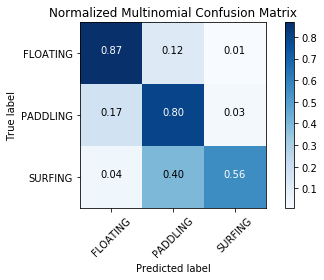

In [326]:
MLP_test_kalman=ModelTest(model='MLP',data=simple_multi_data,use_balanced_data=True,scale_data=True,PCA=True,components=15)

Setting up test...
Separating features and labels within the dataset...
X.shape: (6688, 17)
y.shape: (6688,)
y: ['PADDLING' 'PADDLING' 'PADDLING' ... 'SURFING' 'SURFING' 'SURFING']
**************************************************
Splitting data into training and test sets...
X_train shape: (6019, 17)
y_train shape: (6019,)
X_test shape: (669, 17)
y_test shape: (669,)
Scaling data...
Balancing training set...
X_train shape: (11694, 17)
y_train shape: (11694,)
Training model...
Running test...
Multinomial LR normalized confusion matrix
[[0.86956522 0.10869565 0.02173913]
 [0.22173913 0.75217391 0.02608696]
 [0.2        0.16       0.64      ]]
[0.53731343 0.86119403 0.78923767 0.8445441  0.8445441  0.82810164
 0.77694611 0.80389222 0.48053892 0.45359281]
Average cross validation score:  0.7219905026303727
Median cross validation score:  0.7965649418651486
Standard Deviation of cross validation scores:  0.1547152086814327





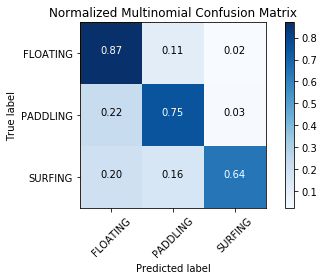

In [320]:
MLP_test_kalman=ModelTest(model='MLP',data=simple_multi_data,use_balanced_data=True,scale_data=True,PCA=True,components=17)

Setting up test...
Separating features and labels within the dataset...
X.shape: (6688, 20)
y.shape: (6688,)
y: ['PADDLING' 'PADDLING' 'PADDLING' ... 'SURFING' 'SURFING' 'SURFING']
**************************************************
Splitting data into training and test sets...
X_train shape: (6019, 20)
y_train shape: (6019,)
X_test shape: (669, 20)
y_test shape: (669,)
Scaling data...
Balancing training set...
X_train shape: (11694, 20)
y_train shape: (11694,)
Training model...
Running test...
Multinomial LR normalized confusion matrix
[[0.89371981 0.10386473 0.00241546]
 [0.09565217 0.89565217 0.00869565]
 [0.04       0.12       0.84      ]]
[0.52537313 0.86716418 0.80866966 0.8490284  0.82361734 0.81165919
 0.75898204 0.81287425 0.47155689 0.52095808]
Average cross validation score:  0.724988315985658
Median cross validation score:  0.8101644245142003
Standard Deviation of cross validation scores:  0.14643208907388167





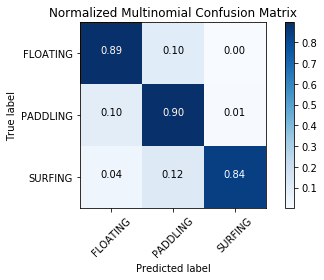

In [325]:
MLP_test_kalman=ModelTest(model='MLP',data=simple_multi_data,use_balanced_data=True,scale_data=True,PCA=True,components=20)

Anywhere from 10 to 20 principal components offers optimal performance. Note that the results shown in the confusion matrix are subject to change and may not necessarily be representative of the performance of the classifier in practice.

In [406]:
simple_multi_data

,IMU A1,IMU A2,IMU A3,IMU G1,IMU G2,IMU G3,IMU M1,IMU M2,IMU M3,Kalman V1,...,KA1,KA2,KA3,AVG V1,AVG V2,AVG V3,MED V1,MED V2,MED V3,simple_label
0,0.344538,11.637728,2.775445,-2.195122,-5.000000,8.414634,-37.0,-165.0,197.0,0.043067,...,0.057423,1.939621,0.462574,0.043067,1.454716,0.346931,0.043067,1.454716,0.346931,PADDLING
1,-1.894959,10.087307,0.861345,16.585366,-4.146341,7.560976,-45.0,-163.0,201.0,-0.204656,...,-0.430673,3.976543,0.562267,-0.080794,2.161210,0.413493,-0.080794,2.161210,0.413493,PADDLING
2,-1.435575,10.699819,1.607844,1.829268,-6.219512,-4.390244,-42.0,-158.0,216.0,-0.384677,...,-0.726232,5.953977,0.869790,-0.182088,2.241111,0.370726,-0.204656,2.400913,0.346931,PADDLING
3,4.402430,8.288053,1.952382,-7.317073,-6.097561,3.292683,-41.0,-165.0,195.0,0.391625,...,0.891534,6.690229,1.211278,-0.038660,2.307433,0.395532,-0.080794,2.453656,0.408440,PADDLING
4,-1.856677,11.465459,2.392625,3.902439,-8.170732,20.121951,-46.0,-166.0,186.0,0.294034,...,-0.002412,8.243530,1.595550,0.027879,2.302253,0.416795,0.043067,2.400913,0.469950,PADDLING
5,14.987403,21.839881,10.259576,-32.439024,0.121951,2.195122,-47.0,-165.0,175.0,1.733256,...,4.940271,12.726738,4.452393,0.312108,2.651261,0.625678,0.168551,2.453656,0.475003,PADDLING
6,-0.229692,8.307194,0.363679,57.073171,22.682927,-15.487805,-48.0,-180.0,150.0,1.948018,...,3.225235,11.260640,3.096041,0.545810,2.840997,0.736620,0.294034,2.506399,0.480056,PADDLING
7,-2.450048,12.652201,-1.186742,28.414634,-17.317073,5.853659,-50.0,-160.0,210.0,-0.309510,...,1.337521,11.723501,1.671500,0.438895,2.788474,0.632659,0.168551,2.463605,0.475003,PADDLING
8,-2.048087,8.364617,3.273111,-0.365854,5.975610,10.853659,-50.0,-166.0,206.0,-0.593754,...,0.210058,10.604938,2.204863,0.324156,2.786890,0.592964,0.043067,2.506399,0.469950,PADDLING
9,0.478525,10.604114,0.727358,-12.804878,-0.365854,4.756098,-56.0,-174.0,194.0,-0.181284,...,0.299509,10.604663,1.712569,0.273612,2.727290,0.579873,-0.069109,2.463605,0.466002,PADDLING
